<!--<div align="center">Семинар № 5-->

<div align="center"><font color=#4682B4 size=5 face=
                          "segoe print"><em><strong>Семинар № 9</strong></em></font></div>

<div class="alert alert-block alert-info"><em>
<b>ЗАДАЧА № 1.</b><br> Даны значения величины заработной платы заемщиков банка (zp) и<br>
значения их поведенческого кредитного скоринга (ks):<br>
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br>
Используя математические операции, посчитать коэффициенты линейной регрессии,<br>
приняв за X заработную плату (то есть, zp - признак),<br> а за y - значения скорингового балла
(то есть, ks - целевая переменная).<br>
Произвести расчет как с использованием intercept, так и без.
</em></div>

<font size="2px">Коэффициенты линейной регрессии (с интерсептом и без) найдем двумя способами :<br>
    
<font size="4px">1.а. Математические формулы ( без интерсепта ).

### $\widehat{y}=\beta x$<font size="2px">, где <font size="3px">$\hat \beta=\frac{\displaystyle n\sum_{i=1}^n x_i y_i}{\displaystyle \sum_{i=1}^n x_i^2}$

In [181]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
n = len(zp)

<font size="2px">Подготовим данные

In [182]:
pr = [zp[i] * ks[i] for i in range(n)]
zp2 = [zp[i] ** 2 for i in range(n)]

In [183]:
b = (sum(pr) / n) / (sum(zp2) / n)
print(f'Коэффициент B = {b: 0.10f}')

Коэффициент B =  5.8898204201


<font size="4px">1.б. Математические формулы ( с интерсептом ).

### $\widehat{y}=\beta_0+\beta_1x$	,<font size="2px"> где <font size="3px">$\beta_0=\underline y - \beta_1 \underline x$<font size="2px"> и<br>
<font size="3px">$\underline y=\frac{\displaystyle \sum_{i=1}^n y_i}{\displaystyle n} ;\underline x=\frac{\displaystyle \sum_{i=1}^n x_i}{\displaystyle n} .$   
    
    

#### $\beta_1=\frac{\displaystyle n\sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}
{\displaystyle n\sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i\right)^2}$



<font size="2px">Тогда значения<font size="3px">$\beta_1$ и $\beta_0$<font size="2px"> :

In [184]:
b_1 = (n * sum(pr) - sum(zp) * sum(ks)) / (n * sum(zp2) - sum(zp) ** 2)
b_0 = sum(ks) / n - b_1 * sum(zp) / n
print(f'Коэффициенты B0 = {b_0: 0.3f}, B1 = {b_1: 0.3f}')

Коэффициенты B0 =  444.177, B1 =  2.621


<font size="2px">Такие же значения коэффициентов можно получить с помощью функции из _**Numpy Python**_-библиотеки.

In [185]:
import numpy as np
b_1n, b_0n = np.polyfit(zp, ks, deg=1)
print(f'B0n = {b_0n: 0.3f}, B1n = {b_1n: 0.3f}')

B0n =  444.177, B1n =  2.621


<div class="alert alert-block alert-success"><em>
<font size="3px">Рассчитанное по математическим формулам уравнение линейной регрессии ( без интерсепта)<br>  имеет вид :<font size="4px"><font size="3px">$\displaystyle y = 5,9 x $,<br> 
 а уравнение линейной регрессии ( с интерсептом) имеет вид :<font size="3px">
 $\displaystyle y = 444,2 + 2,6 x $     
</em></div>

<font size="2px">Построим график с решением :

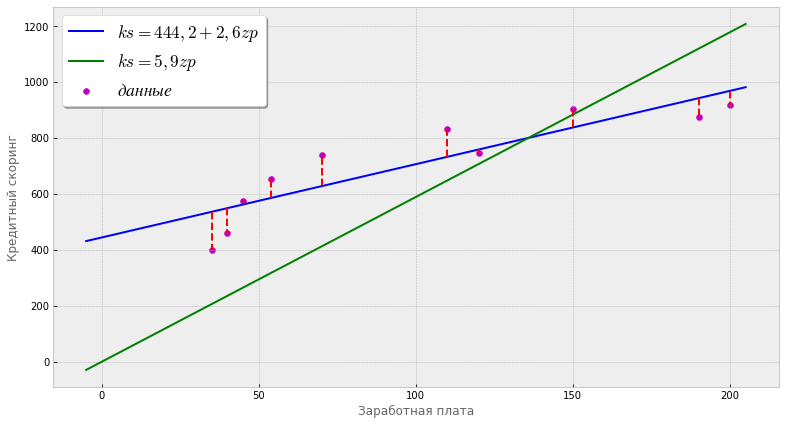

In [186]:
import matplotlib.pyplot as plt
x = np.arange(-5, 205, 0.01)
y0 = b * x
y1 = b_0 + b_1 * x

with plt.style.context('bmh'):
    plt.figure(figsize=(13, 7))
    plt.xlabel('Заработная плата', c = 'k', alpha=0.6)
    plt.ylabel('Кредитный скоринг', c = 'k', alpha=0.6)
    plt.plot(x, y1, c = 'b', label="$ks = 444,2 + 2,6 zp $")
    plt.plot(x, y0, c = 'g', label="$ks = 5,9 zp $")
    plt.scatter(zp,ks, c = 'm', label="$данные$")
    plt.legend(fontsize='xx-large', facecolor='w', shadow=True)
    for i in range(n):
        plt.plot((zp[i], zp[i]),(b_0 + b_1 * zp[i],ks[i]), 'r--')
    plt.show()

<font size="4px">2.а. Матричный метод ( без интерсепта ).

$
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
\vdots\\
y_n\\
\end{bmatrix} = 
$
$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\vdots\\
x_n\\
\end{bmatrix} \times \beta
$

$\beta=(X_0^Т \times X_0)^{-1}\times X_0^Т \times Y$

<font size="2px">Подготовим данные

In [187]:
zpM_0 = [[el] for el in zp]
zpM_0

[[35], [45], [190], [200], [40], [70], [54], [150], [120], [110]]

In [188]:
ksM = [[el] for el in ks]
ksM

[[401], [574], [874], [919], [459], [739], [653], [902], [746], [832]]

In [189]:
zpM_0_T = [zp]
zpM_0_T

[[35, 45, 190, 200, 40, 70, 54, 150, 120, 110]]

<font size="2px">Нахождение обратной матрицы и умножение матриц простыми средствами
_**Python**_ преставляется<br> излишне трудозатратным и ,очевидно, выходящим за рамки данной задачи,<br>поэтому воспользуемся встроенными функциями из _**Numpy Python**_-библиотеки.


In [190]:
zpM_0n = np.array(zpM_0)
ksMn = np.array(ksM)
zpM_0_Tn = np.array(zpM_0_T)

In [191]:
bM = np.linalg.inv(zpM_0_Tn @ zpM_0n) @ zpM_0_Tn @ ksMn
bM
print(f'Коэффициент B = {bM[0, 0]: 0.3f}')

Коэффициент B =  5.890


<font size="4px">2.б. Матричный метод ( с интерсептом ).

$
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
\vdots\\
y_n\\
\end{bmatrix} = 
$
$
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots & \vdots\\
1 & x_n\\
\end{bmatrix} \times
 $
$
\begin{bmatrix}
\beta_0\\
\beta_1\\
\end{bmatrix}
$

$
\widehat B = \begin{bmatrix}
\beta_0\\
\beta_1\\
\end{bmatrix} =
$
$(X_1^Т \times X_1)^{-1}\times X_1^Т \times Y
$

<font size="2px">Подготовим данные

In [192]:
zpM_1 = [[1, el] for el in zp]
zpM_1

[[1, 35],
 [1, 45],
 [1, 190],
 [1, 200],
 [1, 40],
 [1, 70],
 [1, 54],
 [1, 150],
 [1, 120],
 [1, 110]]

In [193]:
zpM_1_T = [[1] * n, zp]
zpM_1_T

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]]

In [194]:
zpM_1n = np.array(zpM_1)
zpM_1_Tn = np.array(zpM_1_T)

In [195]:
bM_0, bM_1 = np.linalg.inv(zpM_1_Tn @ zpM_1n) @ zpM_1_Tn @ ksMn
bM_0, bM_1
print(f'Коэффициенты B0 = {bM_0[0]: 0.3f}, B1 = {bM_1[0]: 0.3f}')

Коэффициенты B0 =  444.177, B1 =  2.621


<div class="alert alert-block alert-success"><em>
<font size="3px">Рассчитанное матричным методом уравнение линейной регрессии ( без интерсепта)<br>  имеет вид :<font size="3px">$\displaystyle y = 5,9 x $,<br> 
 а уравнение линейной регрессии ( с интерсептом) имеет вид :<font size="3px">
 $\displaystyle y = 444,2 + 2,6 x $ <br>
    
<b>Ответ:</b><br>Уравненияб рассчитанные двумя разными методами идентичны.    
</em></div>
    
***

<div class="alert alert-block alert-info"><em>
<b> ЗАДАЧА № 2. </b><br> Посчитать коэффициент линейной регрессии при заработной плате (zp),<br>
используя градиентный спуск (без intercept).
</em></div>

<font size="2px">Предположим, что мы не делали расчётов в предыдущей задаче,<br>
и нам необходимо найти линейную функцию вида : <font size="3px">$\widehat{y}=\beta x$<br>
<font size="2px">Мерой измерения ошибок примем среднеквадратичное отклонение данных в задаче от предсказанных прямой :<font size="3px"> $mse = \frac{1}{\displaystyle n}\displaystyle \sum_{i=1}^n(ks - \widehat{y})^2$ <br>
<font size="2px">Тогда необходимо найти такое <font size="3px">$\beta$<font size="2px">,
когда <font size="3px">$mse$<font size="2px"> минимально.
<br><br>
Для начала полезно сделать следующую визуализацию :    

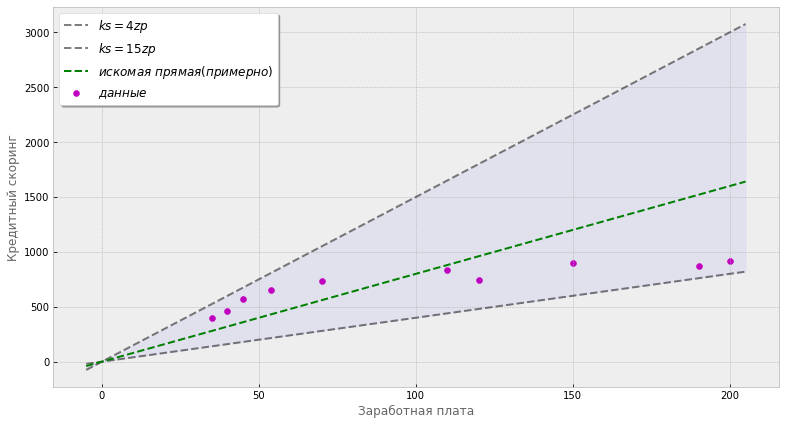

In [196]:
import matplotlib.pyplot as plt
x = np.arange(-5, 205, 0.01)
y_n = 4 * x
y_v = 15 * x
y_i = 8 * x

with plt.style.context('bmh'):
    plt.figure(figsize=(13, 7))
    plt.xlabel('Заработная плата', c = 'k', alpha=0.6)
    plt.ylabel('Кредитный скоринг', c = 'k', alpha=0.6)
    plt.plot(x, y_n, c = 'k', alpha=0.5,  ls = '--', label="$ks = 4 zp $")
    plt.plot(x, y_v, c = 'k', alpha=0.5, ls = '--', label="$ks = 15 zp $")
    plt.fill_between (x, y_n, y_v, color='b', alpha= .05)
    plt.plot(x, y_i, c = 'g', alpha=1, ls = '--', label="$искомая$ $прямая(примерно)$")
    plt.scatter(zp,ks, c = 'm', label="$данные$")
    plt.legend(fontsize='large', facecolor='w', shadow=True)

plt.show()

<font size="2px">Из графика понятно, что искомая прямая проходит через начало координат и лежит в области ограниченной двумя прямыми сверху и снизу, а значит $4 < \beta < 15$.

In [197]:
def mse(b:float, sp1:list, sp2:list)->float:
    '''ФУНКЦИЯ ПОТЕРЬ.\
       Принимает на вход коэффициент b, списки параметров и значений;\
        возвращает значение функции потерь.'''
    return sum([(sp2[i] - b * sp1[i]) ** 2 for i in range(len(sp1))]) / len(sp1)

In [198]:
it = 0            # Количество итераций
d = 7             # Количество знаков после запятой
al = 1 / 10 ** d  # Шаг одной итерации
b = 4             # Начальное значение искомого b
while (b < 15):
    mse_n = mse(b, zp, ks)
    mse_k = mse(b + al, zp, ks)
    if mse_k > mse_n:
        print(f'Достигнут min функции потерь при b ={b: 0.{d}f} c {d} знаками после запятой;\
        \n количество итераций - {it}.')
        break
    else:
        b += al 
        it += 1        

Достигнут min функции потерь при b = 5.8898204 c 7 знаками после запятой;        
 количество итераций - 18898204.


<font size="2px">Задача решена, но это потребовало большого количества итераций и затрат времени.<br>
<font size="3px">Воспользуемся методом градиентного спуска.<br>

In [199]:
from sympy import symbols, diff

bb, bi, kk, zz, nn = symbols('b0, b1, ks, zp, n')
mse0 = (bb*zz - kk) ** 2 / nn
mse0

(b0*zp - ks)**2/n

<font size="2px">Найдём первую производную фукции потерь по $\beta_0$.

In [200]:
diff(mse0, bb)

2*zp*(b0*zp - ks)/n

In [201]:
def d_mse(b:float, sp1:list, sp2:list)->float:
    '''ПРОИЗВОДНАЯ ФУНКЦИИ ПОТЕРЬ.\
       Принимает на вход коэффициент b, списки параметров и значений;\
        возвращает значение производной функции потерь.'''
    return 2 * sum([(b * sp1[i] - sp2[i]) * sp1[i] for i in range(len(sp1))]) / len(sp1)

In [202]:
it = 0            # Количество итераций
d = 7             # Количество знаков после запятой
al = 1 / 10 ** d  # Коэффициент одной итерации
b_n = 4           # Начальное значение искомого b
while (b_n < 15):
    b_k = b_n - al * d_mse(b_n, zp, ks)
    mse_n = mse(b_n, zp, ks)
    mse_k = mse(b_k, zp, ks)
    
    if mse_k > mse_n:
        print(f'Достигнут min функции потерь при b ={b_k: 0.{d}f} c {d} знаками после запятой;\
        \n количество итераций - {it}.')
        break
    else:
        b_n = b_k 
        it += 1 
        if it % 500 == 0: print(f'Кол.итераций  {it};   B-текущее  {b_n:.5f};\
   Произв.фукции потерь  {d_mse(b_n, zp, ks):.5f}') 

Кол.итераций  500;   B-текущее  5.41417;   Произв.фукции потерь  -13105.59253
Кол.итераций  1000;   B-текущее  5.77011;   Произв.фукции потерь  -3298.53229
Кол.итераций  1500;   B-текущее  5.85969;   Произв.фукции потерь  -830.20399
Кол.итераций  2000;   B-текущее  5.88224;   Произв.фукции потерь  -208.95314
Кол.итераций  2500;   B-текущее  5.88791;   Произв.фукции потерь  -52.59119
Кол.итераций  3000;   B-текущее  5.88934;   Произв.фукции потерь  -13.23662
Кол.итераций  3500;   B-текущее  5.88970;   Произв.фукции потерь  -3.33151
Кол.итераций  4000;   B-текущее  5.88979;   Произв.фукции потерь  -0.83850
Кол.итераций  4500;   B-текущее  5.88981;   Произв.фукции потерь  -0.21104
Кол.итераций  5000;   B-текущее  5.88982;   Произв.фукции потерь  -0.05312
Достигнут min функции потерь при b = 5.8898199 c 7 знаками после запятой;        
 количество итераций - 5465.


<font size="2px">Метод градиентного спуска существенно эффективней. Количество итераций снижено на **$300$** порядков.

<div class="alert alert-block alert-success"><em>
<font size="3px"><b>Ответ:</b><br> Коэффициент линейной регрессии, рассчитанный методом градиентного спуска (без intercept) : $\displaystyle \beta = 5,8898 $
</em></div>

***

<div class="alert alert-block alert-info"><em>
<b> ЗАДАЧА № 3. </b><br> Произвести вычисления как в пункте 2, но с вычислением intercept.<br>
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно<br>
(то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).
</em></code>

<font size="2px">Необходимо найти линейную функцию вида :
    <font size="3px">$\widehat{y}=\beta_0 +\beta_1 x$<br>
<font size="2px">Мерой измерения ошибок примем среднеквадратичное отклонение данных в задаче от предсказанных прямой :<font size="3px"> $mse = \frac{1}{\displaystyle n}\displaystyle \sum_{i=1}^n(ks - \widehat{y})^2$ <br>
<font size="2px">Необходимо найти такие <font size="3px">$\beta_0 , \beta_1$<font size="2px">,
когда <font size="3px">$mse$<font size="2px"> минимально.
<br><br>
Для определения начальных значений построим графики :    

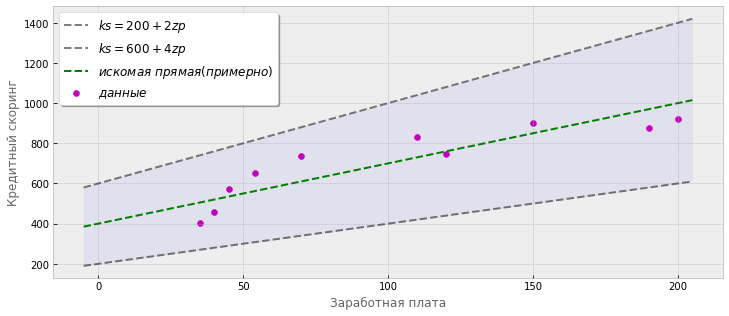

In [203]:
import matplotlib.pyplot as plt
x = np.arange(-5, 205, 0.01)
y_n = 200 + 2 * x
y_v = 600 + 4 * x
y_i = 400 + 3 * x

with plt.style.context('bmh'):
    plt.figure(figsize=(12, 5))
    plt.xlabel('Заработная плата', c = 'k', alpha=0.6)
    plt.ylabel('Кредитный скоринг', c = 'k', alpha=0.6)
    plt.plot(x, y_n, c = 'k', alpha=0.5,  ls = '--', label="$ks = 200 + 2 zp $")
    plt.plot(x, y_v, c = 'k', alpha=0.5, ls = '--', label="$ks = 600 + 4 zp $")
    plt.fill_between (x, y_n, y_v, color='b', alpha= .05)
    plt.plot(x, y_i, c = 'g', alpha=1, ls = '--', label="$искомая$ $прямая(примерно)$")
    plt.scatter(zp,ks, c = 'm', label="$данные$")
    plt.legend(fontsize='large', facecolor='w', shadow=True)

plt.show()

<font size="2px">Из графика понятно, что искомая прямая лежит в области ограниченной двумя прямыми сверху и снизу, а значит $200 < \beta_0 < 600$ , $2 < \beta_1 < 4$.

In [205]:
mse1 = (kk - bb - bi * zz) ** 2 / nn
mse1

(-b0 - b1*zp + ks)**2/n

In [206]:
def mse_01(b0:float, b1:float, sp1:list, sp2:list)->float:
    '''ФУНКЦИЯ ПОТЕРЬ.\
       Принимает на вход коэффициенты b0 и b1, списки параметров и значений;\
        возвращает значение функции потерь.'''
    return sum([(sp2[i] - b0 - b1 * sp1[i]) ** 2 for i in range(len(sp1))]) / len(sp1)

<font size="2px">Первая производная фукции потерь по $\beta_0$.

In [207]:
diff(mse1, bb)

(2*b0 + 2*b1*zp - 2*ks)/n

<font size="2px">Первая производная фукции потерь по $\beta_1$.

In [208]:
diff(mse1, bi)

-2*zp*(-b0 - b1*zp + ks)/n

In [209]:
def d_mse0(b0:float, b1:float, sp1:list, sp2:list)->float:
    '''ПРОИЗВОДНАЯ ФУНКЦИИ ПОТЕРЬ ПО В0.\
       Принимает на вход коэффициенты b0 и b1, списки параметров и значений;\
        возвращает значение производной функции потерь по b0.'''
    return 2 * sum([b0 + b1 * sp1[i] - sp2[i] for i in range(len(sp1))]) / len(sp1)

In [210]:
def d_mse1(b0:float, b1:float, sp1:list, sp2:list)->float:
    '''ПРОИЗВОДНАЯ ФУНКЦИИ ПОТЕРЬ ПО В1.\
       Принимает на вход коэффициенты b0 и b1, списки параметров и значений;\
        возвращает значение производной функции потерь по b1.'''
    return 2 * sum([(b0 + b1 * sp1[i] - sp2[i]) * sp1[i] for i in range(len(sp1))]) / len(sp1)

In [217]:
it = 0            # Количество итераций
al = 5 / 10 ** 5  # Коэффициент одной итерации
b0_n = 200        # Начальное значение искомого b0
b1_n = 2          # Начальное значение искомого b1

while (it < 1000001):
    b0_k = b0_n - al * d_mse0(b0_n, b1_n, zp, ks)
    b1_k = b1_n -  al * d_mse1(b0_n, b1_n, zp, ks)
    mse01_k = mse_01(b0_k, b1_k, zp, ks)
    if it % 100000 == 0:
        print(f'Кол.итераций= {it:7.0f}; B0= {b0_n:.7f};\
 B1= {b1_n:.8f}; mse= {mse01_k:0.7f}') 
        
    b0_n = b0_k 
    b1_n = b1_k 
    it += 1 

Кол.итераций=       0; B0= 200.0000000; B1= 2.00000000; mse= 33082.4879311
Кол.итераций=  100000; B0= 424.8547051; B1= 2.76276215; mse= 6565.1189681
Кол.итераций=  200000; B0= 442.6481733; B1= 2.63179435; mse= 6471.0073420
Кол.итераций=  300000; B0= 444.0563386; B1= 2.62142963; mse= 6470.4179160
Кол.итераций=  400000; B0= 444.1677800; B1= 2.62060938; mse= 6470.4142244
Кол.итераций=  500000; B0= 444.1765994; B1= 2.62054446; mse= 6470.4142013
Кол.итераций=  600000; B0= 444.1772973; B1= 2.62053932; mse= 6470.4142012
Кол.итераций=  700000; B0= 444.1773526; B1= 2.62053892; mse= 6470.4142012
Кол.итераций=  800000; B0= 444.1773569; B1= 2.62053889; mse= 6470.4142012
Кол.итераций=  900000; B0= 444.1773573; B1= 2.62053888; mse= 6470.4142012
Кол.итераций= 1000000; B0= 444.1773573; B1= 2.62053888; mse= 6470.4142012


<div class="alert alert-block alert-success"><em>
<b>Ответ:</b><br> Уравнение линейной регрессии ( с интерсептом) имеет вид :<font size="3px">
 $\displaystyle y = 444,177 + 2,621 x $ <br>
</em></div>

***